**Data Science and Business Analytics**

The Sparks Foundation GRIP August 2021

**By: Nikshita Shetty**

**TASK 3: Prediction using Decision Tree Algorithm**

Create the Decision Tree classifier and visualize it graphically.

For this task we will use the 'Iris' dataset.

Steps to be performed:

**Importing the libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

**Importing the Iris dataset**


In [2]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [5]:
#how many data points for each class are present?
iris_data["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

**Knowing missing values**

In [6]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

**Visualising the sepal and petal dimensions**

In [7]:
sns.set_style("darkgrid")

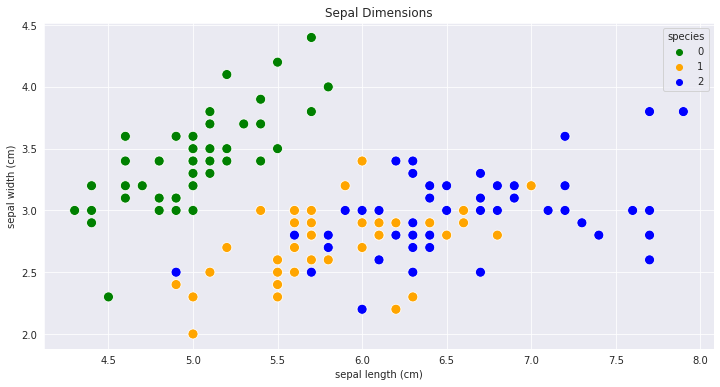

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris_data["sepal length (cm)"], 
                y=iris_data["sepal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);

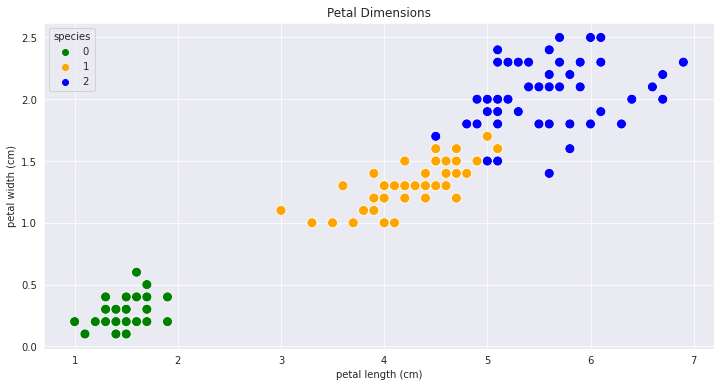

In [9]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["petal length (cm)"], 
                y=iris_data["petal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);

**Analysing the distributions of sepal and petal dimensions**

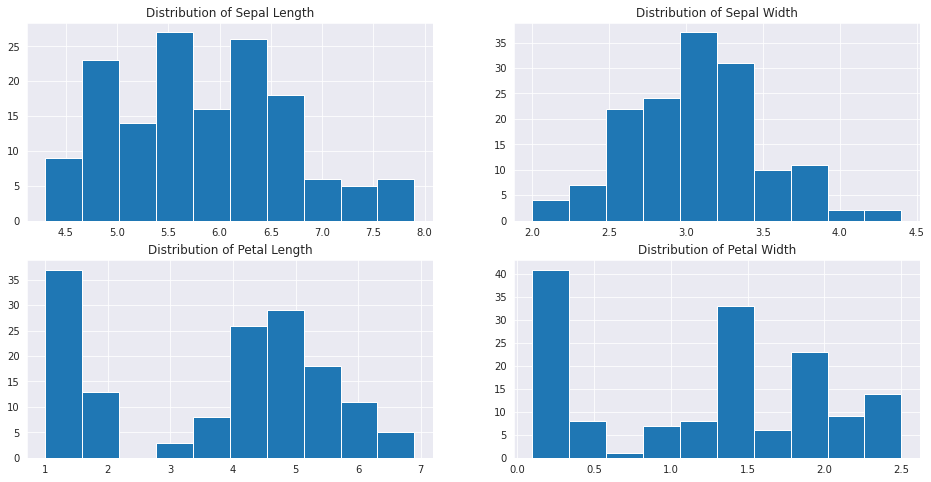

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(iris_data["sepal length (cm)"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(iris_data["sepal width (cm)"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(iris_data["petal length (cm)"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(iris_data["petal width (cm)"]);

**Analysing correlation between feature and Target**

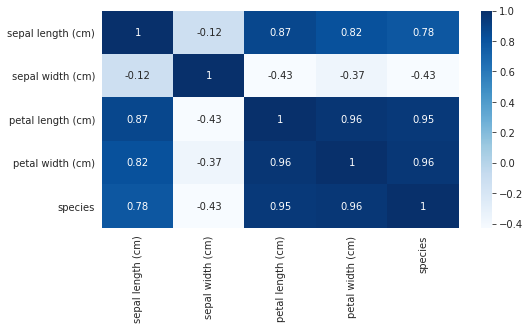

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues');

**Splitting The Data into Training And Testing Dataset**

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)

In [13]:
train.shape, test.shape

((120, 5), (30, 5))

In [14]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [15]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9333333333333333


In [18]:
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = iris_data.species

In [19]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


**Let us visualize the Decision Tree to understand it better**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


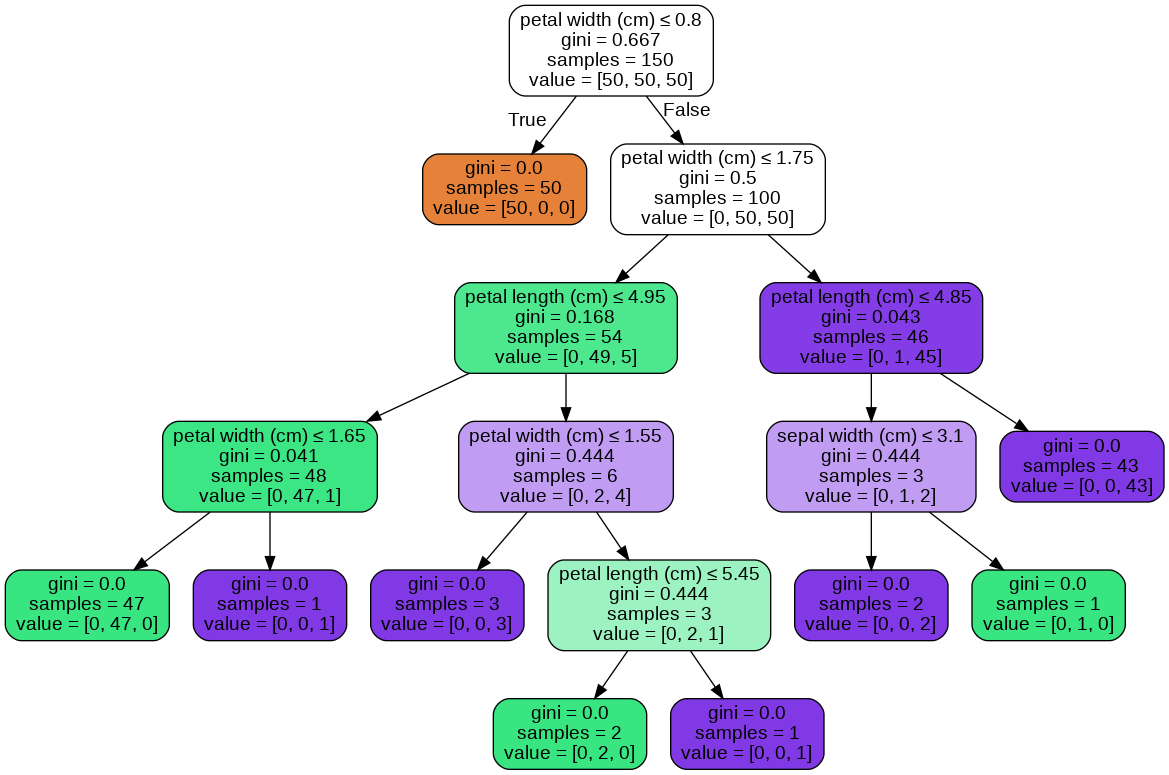

In [20]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree1, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())